In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("..")  # if simulator.ipynb is in /notebooks/

import pickle

from simulation.core import System
from simulation.controller import TrafficController
from simulation.data_logger import DataLogger
from simulation.core import Road, Obstacle
from simulation.spawners import timed_spawner


In [46]:
dt = 0.1
sim_time = 500

system = System(dt=dt, final_time=sim_time)

start_pos = (0, 300)
end_pos = (800, 300)
road = Road(1, 10000, start_pos, end_pos)

system.add_road(road)
road.set_next_road(road)

logger = DataLogger(expected_total_cars=50, tag="basic_one_road_test")
controller = TrafficController(system, logger=logger)

system.gaussian_spread_car_creator(20, "basic", 0, 0)


Inserting car with index: 1 at time: 0
Inserting car with index: 2 at time: 0
Inserting car with index: 3 at time: 0
Inserting car with index: 4 at time: 0
Inserting car with index: 5 at time: 0
Inserting car with index: 6 at time: 0
Inserting car with index: 7 at time: 0
Inserting car with index: 8 at time: 0
Inserting car with index: 9 at time: 0
Inserting car with index: 10 at time: 0
Inserting car with index: 11 at time: 0
Inserting car with index: 12 at time: 0
Inserting car with index: 13 at time: 0
Inserting car with index: 14 at time: 0
Inserting car with index: 15 at time: 0
Inserting car with index: 16 at time: 0
Inserting car with index: 17 at time: 0
Inserting car with index: 18 at time: 0
Inserting car with index: 19 at time: 0
Inserting car with index: 20 at time: 0


In [47]:
for _ in range(int(system.final_time / system.dt)):
    controller.control(system.dt)
    system.update(logger=logger)

The current time now is: 0.1
The current time now is: 10.09999999999998
The current time now is: 20.000000000000014
The current time now is: 30.000000000000156
The current time now is: 40.0000000000003
The current time now is: 50.00000000000044
The current time now is: 60.00000000000058
The current time now is: 70.0000000000003
The current time now is: 80.09999999999972
The current time now is: 90.09999999999916
The current time now is: 100.09999999999859
The current time now is: 110.09999999999802
The current time now is: 120.09999999999745
The current time now is: 130.0999999999969
The current time now is: 140.09999999999633
The current time now is: 150.09999999999576
The current time now is: 160.0999999999952
The current time now is: 170.09999999999462
The current time now is: 180.09999999999405
The current time now is: 190.09999999999349
The current time now is: 200.09999999999292
The current time now is: 210.09999999999235
The current time now is: 220.09999999999178
The current ti

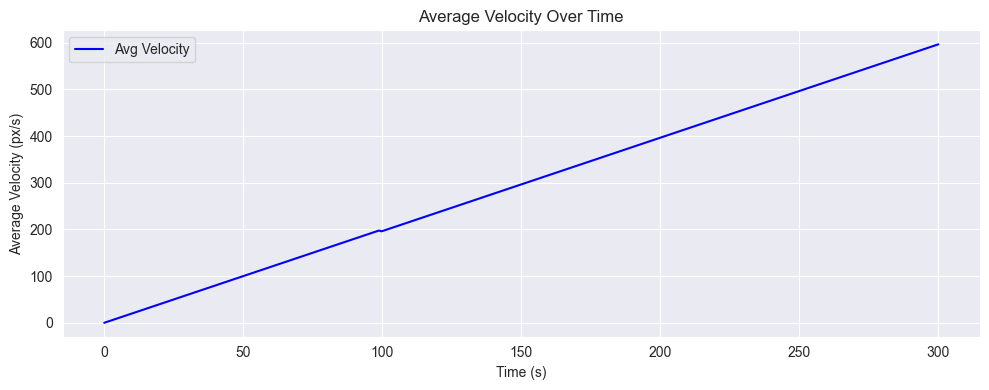


   time  car_id  lane_id  offset  velocity  acceleration driver_type  \
0   0.1       1        0    0.02       0.2           2.0       basic   
1   0.2       1        0    0.06       0.4           2.0       basic   
2   0.3       1        0    0.12       0.6           2.0       basic   
3   0.4       1        0    0.20       0.8           2.0       basic   
4   0.5       1        0    0.30       1.0           2.0       basic   

   desired_speed  
0       2.885379  
1       2.885379  
2       2.885379  
3       2.885379  
4       2.885379  


In [72]:
df = logger.to_dataframe()

avg_velocity_by_time = df.groupby("time")["velocity"].mean()

plt.figure(figsize=(10, 4))
plt.plot(avg_velocity_by_time.index, avg_velocity_by_time.values, color='blue', label="Avg Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Average Velocity (px/s)")
plt.title("Average Velocity Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print()
print(df.head())

In [95]:
def theoretical_velocity(N, L=800, s0=7, T=1.5):
    spacing = L / (N)
    v = (spacing - s0) / T
    return max(0, v)

# Generate analytical curve
x_vals = np.arange(1, 60)
y_theory = np.array([theoretical_velocity(n) for n in x_vals])

In [96]:
# Run loop

avg_velocities = []
for i in range(5, 40):
    
    system = System(dt=dt, final_time=sim_time)

    start_pos = (0, 300)
    end_pos = (800, 300)
    road = Road(1, 10000, start_pos, end_pos)


    system.add_road(road)
    road.set_next_road(road)

    logger = DataLogger(expected_total_cars=i, tag="basic_one_road_test")
    controller = TrafficController(system, logger=logger)

    system.equal_distance_car_creator(i+1, "basic", 0, 0)

    for _ in range(int(system.final_time / system.dt)):
        controller.control(system.dt)
        system.update(logger=logger)

    df = logger.to_dataframe()
    avg_velocity_by_time = df.groupby("time")["velocity"].mean()
    avg_velocities.append([i+1, avg_velocity_by_time[sim_time-1]])
    print(avg_velocities[-1])

avg_velocities = np.array(avg_velocities)
x = avg_velocities[:, 0]  # car numbers
y = avg_velocities[:, 1]  # average velocities




Inserting car with index: 1 at time: 0
Inserting car with index: 2 at time: 0
Inserting car with index: 3 at time: 0
Inserting car with index: 4 at time: 0
Inserting car with index: 5 at time: 0
Inserting car with index: 6 at time: 0
The current time now is: 0.1
The current time now is: 10.09999999999998
The current time now is: 20.000000000000014
The current time now is: 30.000000000000156
The current time now is: 40.0000000000003
The current time now is: 50.00000000000044
The current time now is: 60.00000000000058
The current time now is: 70.0000000000003
The current time now is: 80.09999999999972
The current time now is: 90.09999999999916
The current time now is: 100.09999999999859
The current time now is: 110.09999999999802
The current time now is: 120.09999999999745
The current time now is: 130.0999999999969
The current time now is: 140.09999999999633
The current time now is: 150.09999999999576
The current time now is: 160.0999999999952
The current time now is: 170.09999999999462


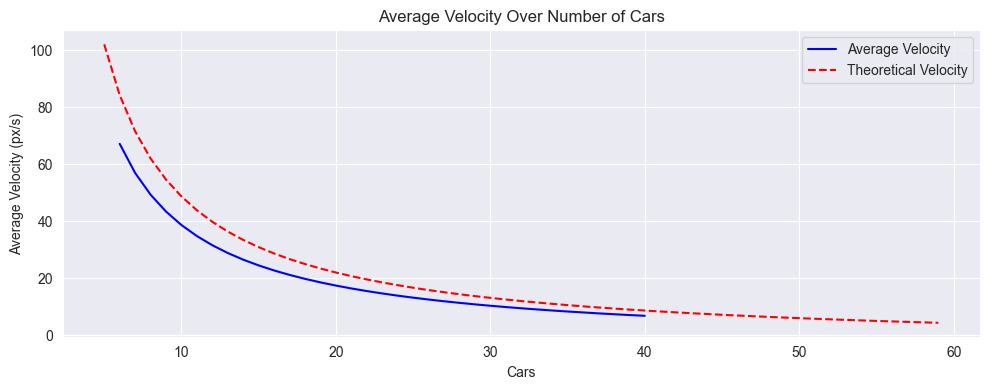

In [97]:
x_mask = x >= 5
x_vals_mask = x_vals >= 5

plt.figure(figsize=(10, 4))
plt.plot(x[x_mask], y[x_mask], label="Average Velocity", color='blue')
plt.plot(x_vals[x_vals_mask], y_theory[x_vals_mask], label="Theoretical Velocity", color='red', linestyle='--')
plt.xlabel("Cars")
plt.ylabel("Average Velocity (px/s)")
plt.title("Average Velocity Over Number of Cars")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
flux_results = []

road_length = 20000
window_start = road_length // 2 - 100
window_end = road_length // 2 + 100
window_length = window_end - window_start

time_window_start = sim_time - 10  # last 10 seconds
time_window_end = sim_time

for i in range(2, 100, 5):
    system = System(dt=dt, final_time=sim_time)

    start_pos = (0, 300)
    end_pos = (road_length, 300)
    road = Road(1, 10000, start_pos, end_pos)

    system.add_road(road)
    road.set_next_road(road)

    num_cars = 20 * i
    logger = DataLogger(expected_total_cars=num_cars, tag="flux_midpoint_test")
    controller = TrafficController(system, logger=logger)

    system.equal_distance_car_creator(num_cars, "basic", 0, 0)

    for _ in range(int(system.final_time / system.dt)):
        controller.control(system.dt)
        system.update(logger=logger)

    df = logger.to_dataframe()

    # Filter to the time window near the end
    df_window = df[(df["time"] >= time_window_start) & (df["time"] <= time_window_end)]

    # Vehicles in spatial window
    in_window = df_window[(df_window["offset"] >= window_start) & (df_window["offset"] <= window_end)]

    if in_window.empty:
        avg_velocity = 0
        density = 0
        flux = 0
    else:
        avg_velocity = in_window["velocity"].mean()
        total_frames = len(df_window["time"].unique())
        avg_cars_per_frame = len(in_window) / total_frames
        density = avg_cars_per_frame / window_length
        flux = density * avg_velocity

    flux_results.append([i, avg_velocity, flux])
    print(f"Cars: {num_cars}, Avg Velocity: {avg_velocity:.2f}, Flux: {flux:.4f}")

# Convert to NumPy for plotting
flux_results = np.array(flux_results)
x = flux_results[:, 1]  # avg velocities
y = flux_results[:, 2]  # flux

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, y, 'o-', label="Flux vs Avg Speed")
plt.xlabel("Average Speed (px/s)")
plt.ylabel("Flux (cars/s)")
plt.title("Flux vs Average Speed (Middle of Road, Time-Averaged)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Inserting car with index: 1 at time: 0
Inserting car with index: 2 at time: 0
Inserting car with index: 3 at time: 0
Inserting car with index: 4 at time: 0
Inserting car with index: 5 at time: 0
Inserting car with index: 6 at time: 0
Inserting car with index: 7 at time: 0
Inserting car with index: 8 at time: 0
Inserting car with index: 9 at time: 0
Inserting car with index: 10 at time: 0
Inserting car with index: 11 at time: 0
Inserting car with index: 12 at time: 0
Inserting car with index: 13 at time: 0
Inserting car with index: 14 at time: 0
Inserting car with index: 15 at time: 0
Inserting car with index: 16 at time: 0
Inserting car with index: 17 at time: 0
Inserting car with index: 18 at time: 0
Inserting car with index: 19 at time: 0
Inserting car with index: 20 at time: 0
Inserting car with index: 21 at time: 0
Inserting car with index: 22 at time: 0
Inserting car with index: 23 at time: 0
Inserting car with index: 24 at time: 0
Inserting car with index: 25 at time: 0
Inserting

In [61]:
def run_density_test(density, road_length=1000, n_lanes=1, max_speed=60, sim_time=60, dt=0.1):
    system = System(dt=dt, final_time=sim_time)
    start = (0, 300)
    end = (road_length, 300)
    road = Road(n_lanes, max_speed, start, end)
    road.set_next_road(road)
    system.add_road(road)

    num_cars = int(density * road_length)
    system.gaussian_spread_car_creator(num_cars, driver_type="random", speed=0, lane_index=0, mean = road_length/4, std_dev=road_length/4)

    logger = DataLogger(expected_total_cars=num_cars)
    controller = TrafficController(system, logger=logger)

    for _ in range(int(sim_time / dt)):
        controller.control(dt)
        system.update(logger)

    df = logger.to_dataframe()
    return df

In [62]:
def get_last_frame_average_velocity(df):
    if df.empty:
        print("No data logged.")
        return None
    last_time = df["time"].max()
    last_frame = df[df["time"] == last_time]
    return last_frame["velocity"].mean()

In [63]:
densities = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

average_speeds = []
for density in densities:
    df = run_density_test(density, road_length=10000, sim_time=300)
    average_speed = get_last_frame_average_velocity(df)
    average_speeds.append(average_speed)

for i in range(len(average_speeds)):
    print(f"Density = {densities[i]}, average speed after 300 seconds = {average_speeds[i]}")


Inserting car with index: 1 at time: 0
Inserting car with index: 2 at time: 0
Inserting car with index: 3 at time: 0
Inserting car with index: 4 at time: 0
Inserting car with index: 5 at time: 0
Inserting car with index: 6 at time: 0
Inserting car with index: 7 at time: 0
Inserting car with index: 8 at time: 0
Inserting car with index: 9 at time: 0
Inserting car with index: 10 at time: 0
Inserting car with index: 11 at time: 0
Inserting car with index: 12 at time: 0
Inserting car with index: 13 at time: 0
Inserting car with index: 14 at time: 0
Inserting car with index: 15 at time: 0
Inserting car with index: 16 at time: 0
Inserting car with index: 17 at time: 0
Inserting car with index: 18 at time: 0
Inserting car with index: 19 at time: 0
Inserting car with index: 20 at time: 0
Inserting car with index: 21 at time: 0
Inserting car with index: 22 at time: 0
Inserting car with index: 23 at time: 0
Inserting car with index: 24 at time: 0
Inserting car with index: 25 at time: 0
Inserting

In [64]:
dt = 0.1
sim_time = 300

system = System(dt=dt, final_time=sim_time)

start_pos = (0, 300)
end_pos = (200000, 300)
road = Road(5, 60, start_pos, end_pos)

system.add_road(road)
logger = DataLogger(expected_total_cars=10000, tag="basic_one_road_test")
controller = TrafficController(system, logger=logger)

controller.add_spawn_rule(timed_spawner(2, 0, 50, 0, "aggressive", speed=20))
controller.add_spawn_rule(timed_spawner(2, 0, 50, 1, "aggressive", speed=10))
controller.add_spawn_rule(timed_spawner(2, 0, 50, 2, speed=20))
controller.add_spawn_rule(timed_spawner(2, 0, 50, 3, speed=10))
controller.add_spawn_rule(timed_spawner(2, 0, 50, 4, speed=20))

system.block_lane_from_offsets(0, 0, 20500, 20700)
system.block_lane_from_offsets(0, 1, 20550, 20650)





In [65]:
for _ in range(int(sim_time / dt)):
        controller.control(dt)
        system.update(logger)

df = logger.to_dataframe()

The current time now is: 0.1
Inserting car with index:  1 at time: 1.9000000000000006
Inserting car with index:  2 at time: 1.9000000000000006
Inserting car with index:  3 at time: 1.9000000000000006
Inserting car with index:  4 at time: 1.9000000000000006
Inserting car with index:  5 at time: 1.9000000000000006
Inserting car with index:  6 at time: 3.900000000000002
Inserting car with index:  7 at time: 3.900000000000002
Inserting car with index:  8 at time: 3.900000000000002
Inserting car with index:  9 at time: 3.900000000000002
Inserting car with index:  10 at time: 3.900000000000002
Inserting car with index:  11 at time: 5.899999999999995
Inserting car with index:  12 at time: 5.899999999999995
Inserting car with index:  13 at time: 5.899999999999995
Inserting car with index:  14 at time: 5.899999999999995
Inserting car with index:  15 at time: 5.899999999999995
Inserting car with index:  16 at time: 7.899999999999988
Inserting car with index:  17 at time: 7.899999999999988
Insert

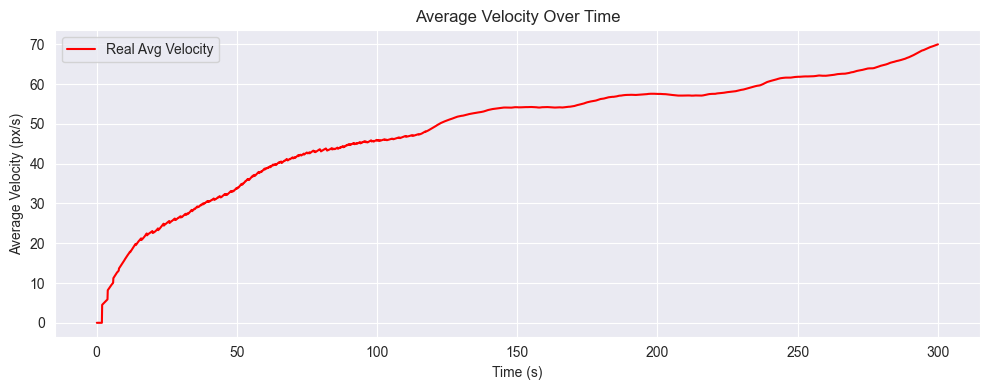

In [67]:
N_total = None

plt.figure(figsize=(10, 4))

grouped = df.groupby("time").agg(
    total_velocity=("velocity", "sum"),
    active_cars=("car_id", "nunique")
)

if N_total is not None:
    grouped["padded_avg_velocity"] = grouped["total_velocity"] / N_total
    plt.plot(grouped.index, grouped["padded_avg_velocity"], label="Padded Avg Velocity", color='green', linewidth=2)


grouped["real_avg_velocity"] = grouped["total_velocity"] / grouped["active_cars"]

plt.plot(grouped.index, grouped["real_avg_velocity"], label="Real Avg Velocity", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Average Velocity (px/s)")
plt.title("Average Velocity Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

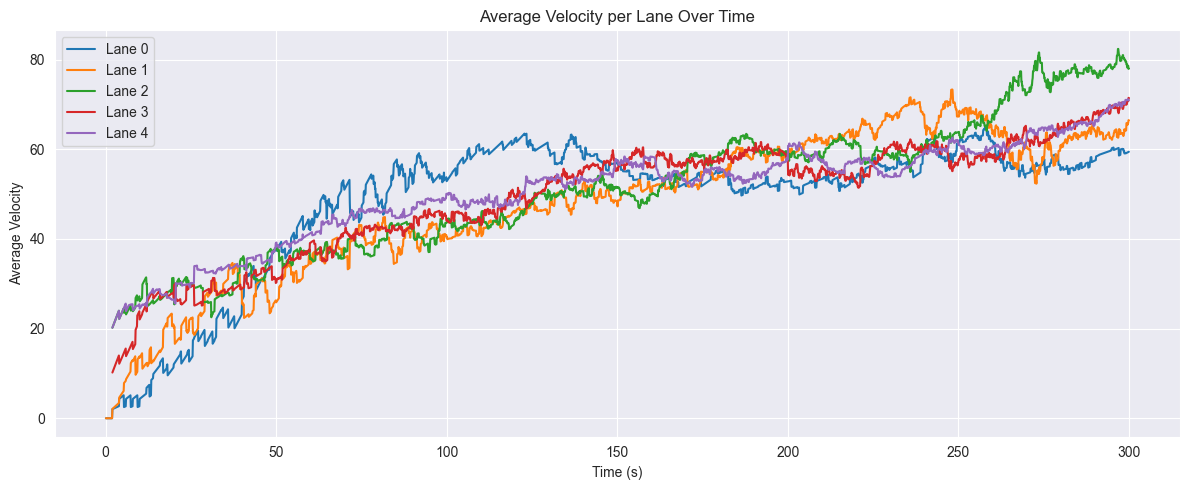

In [68]:
# Group by time and lane, then average velocity
avg_velocity_lane = df.groupby(["time", "lane_id"])["velocity"].mean().unstack()

# Plot each lane
plt.figure(figsize=(12, 5))
for lane in avg_velocity_lane.columns:
    plt.plot(avg_velocity_lane.index, avg_velocity_lane[lane], label=f"Lane {lane}")
plt.xlabel("Time (s)")
plt.ylabel("Average Velocity")
plt.title("Average Velocity per Lane Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


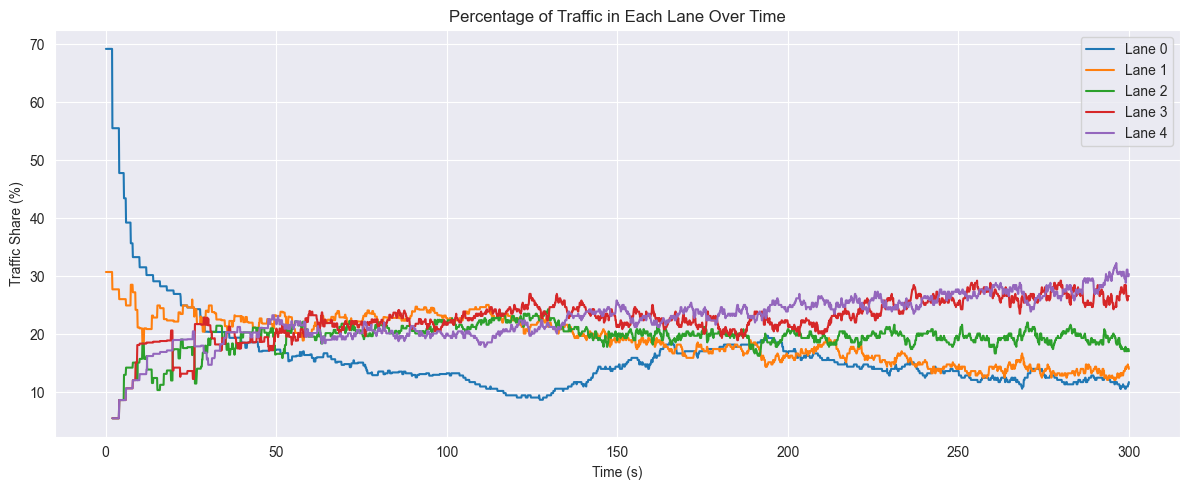

In [36]:
lane_counts = df.groupby(["time", "lane_id"])["car_id"].nunique().unstack()

# Convert to percentage of total cars at each time
lane_percentages = lane_counts.div(lane_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 5))
for lane in lane_percentages.columns:
    plt.plot(lane_percentages.index, lane_percentages[lane], label=f"Lane {lane}")

plt.xlabel("Time (s)")
plt.ylabel("Traffic Share (%)")
plt.title("Percentage of Traffic in Each Lane Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



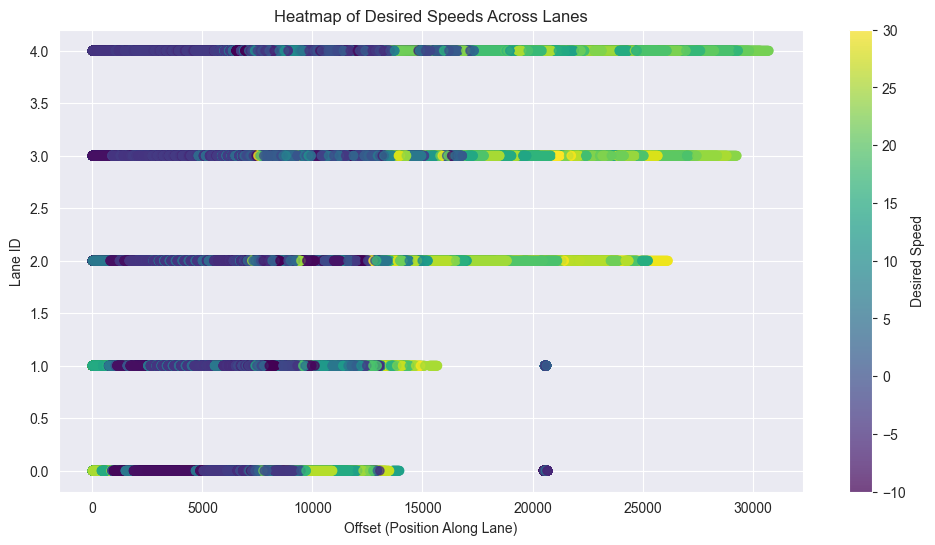

In [37]:
plt.figure(figsize=(12, 6))
sc = plt.scatter(df['offset'], df['lane_id'], c=df['desired_speed'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Desired Speed')
plt.xlabel("Offset (Position Along Lane)")
plt.ylabel("Lane ID")
plt.title("Heatmap of Desired Speeds Across Lanes")
plt.grid(True)
plt.show()

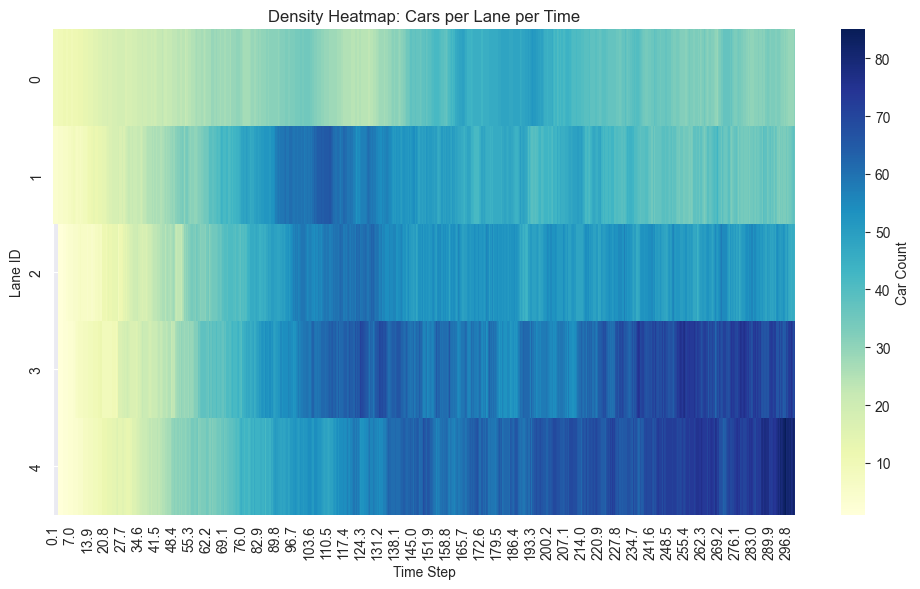

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(lane_counts.T, cmap="YlGnBu", cbar_kws={"label": "Car Count"})
plt.title("Density Heatmap: Cars per Lane per Time")
plt.xlabel("Time Step")
plt.ylabel("Lane ID")
plt.tight_layout()
plt.show()
